# My Asteroids Classification project☄️ 

### Machine Learning


So, let's get started with our machine learning process, and we'll utilize the KNN approach to classify the orbits.

<img src="images/Head.jpg" style="float:right;width:200px;height:100px;border-radius: 50%"/>




In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from astropy import units as u
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from poliastro.plotting import OrbitPlotter3D

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%matplotlib inline

In [279]:
df_JPL = pd.read_csv("df_JPLfinalwithcategories.csv")
df_JPL

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,...,NEO,PHA,CEN,IMB,MBA,MCA,OMB,TJN,AST,M
0,2000001,1 Ceres (A801 AA),2.766,0.0782,10.59,80.27,73.72,2.550,2.98,4.60,...,0,0,0,0,1,0,0,0,0,205.545416
1,2000003,3 Juno (A804 RA),2.668,0.2570,12.99,169.85,248.03,1.982,3.35,4.36,...,0,0,0,0,1,0,0,0,0,170.711245
2,2000004,4 Vesta (A807 FA),2.362,0.0884,7.14,103.81,150.92,2.153,2.57,3.63,...,0,0,0,0,1,0,0,0,0,258.567830
3,2000005,5 Astraea (A845 XA),2.574,0.1908,5.37,141.57,358.63,2.083,3.06,4.13,...,0,0,0,0,1,0,0,0,0,65.612382
4,2000006,6 Hebe (A847 NA),2.425,0.2033,14.74,138.64,239.71,1.932,2.92,3.78,...,0,0,0,0,1,0,0,0,0,242.944820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414016,2424996,424996 (2009 CZ40),3.169,0.1102,9.40,140.76,273.09,2.820,3.52,5.64,...,0,0,0,0,1,0,0,0,0,103.361937
414017,2424997,424997 (2009 CH45),2.987,0.1178,8.14,324.59,79.77,2.635,3.34,5.16,...,0,0,0,0,1,0,0,0,0,172.179562
414018,2424998,424998 (2009 CU48),3.172,0.0740,11.88,307.42,319.26,2.937,3.41,5.65,...,0,0,0,0,1,0,0,0,0,263.203058
414019,2424999,424999 (2009 CB58),3.148,0.0686,13.82,177.56,273.23,2.932,3.36,5.59,...,0,0,0,0,1,0,0,0,0,105.943410


### Dataset visualization


we utilized **Q**,**q**,**a**,**e*** to categorized the data ...because we couldn't draw in 5D (we needed one more dimension for categories). We split most of our data with **q** and **a** so we used them.

In [280]:
df = pd.DataFrame(np.where(df_JPL[['CEN','IMB','MBA','MCA','OMB','TJN','AST']].eq(1), ['CEN','IMB','MBA','MCA','OMB','TJN','AST'], df_JPL[['CEN','IMB','MBA','MCA','OMB','TJN','AST']]), 
                  index=df_JPL[['CEN','IMB','MBA','MCA','OMB','TJN','AST']].index, 
                  columns=df_JPL[['CEN','IMB','MBA','MCA','OMB','TJN','AST']].columns)

df['Category'] = df['CEN']+df['IMB']+df['MBA']+df['MCA']+df['OMB']+df['TJN']+df['AST']

df['Category'] = df['Category'].str.strip("0")

df.drop(['CEN','IMB','MBA','MCA','OMB','TJN','AST'],axis=1,inplace=True)

df_JPL['Category'] = df['Category']

df_JPL

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,...,PHA,CEN,IMB,MBA,MCA,OMB,TJN,AST,M,Category
0,2000001,1 Ceres (A801 AA),2.766,0.0782,10.59,80.27,73.72,2.550,2.98,4.60,...,0,0,0,1,0,0,0,0,205.545416,MBA
1,2000003,3 Juno (A804 RA),2.668,0.2570,12.99,169.85,248.03,1.982,3.35,4.36,...,0,0,0,1,0,0,0,0,170.711245,MBA
2,2000004,4 Vesta (A807 FA),2.362,0.0884,7.14,103.81,150.92,2.153,2.57,3.63,...,0,0,0,1,0,0,0,0,258.567830,MBA
3,2000005,5 Astraea (A845 XA),2.574,0.1908,5.37,141.57,358.63,2.083,3.06,4.13,...,0,0,0,1,0,0,0,0,65.612382,MBA
4,2000006,6 Hebe (A847 NA),2.425,0.2033,14.74,138.64,239.71,1.932,2.92,3.78,...,0,0,0,1,0,0,0,0,242.944820,MBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414016,2424996,424996 (2009 CZ40),3.169,0.1102,9.40,140.76,273.09,2.820,3.52,5.64,...,0,0,0,1,0,0,0,0,103.361937,MBA
414017,2424997,424997 (2009 CH45),2.987,0.1178,8.14,324.59,79.77,2.635,3.34,5.16,...,0,0,0,1,0,0,0,0,172.179562,MBA
414018,2424998,424998 (2009 CU48),3.172,0.0740,11.88,307.42,319.26,2.937,3.41,5.65,...,0,0,0,1,0,0,0,0,263.203058,MBA
414019,2424999,424999 (2009 CB58),3.148,0.0686,13.82,177.56,273.23,2.932,3.36,5.59,...,0,0,0,1,0,0,0,0,105.943410,MBA


Text(0.5, 1.0, 'divison of orbits to Classes')

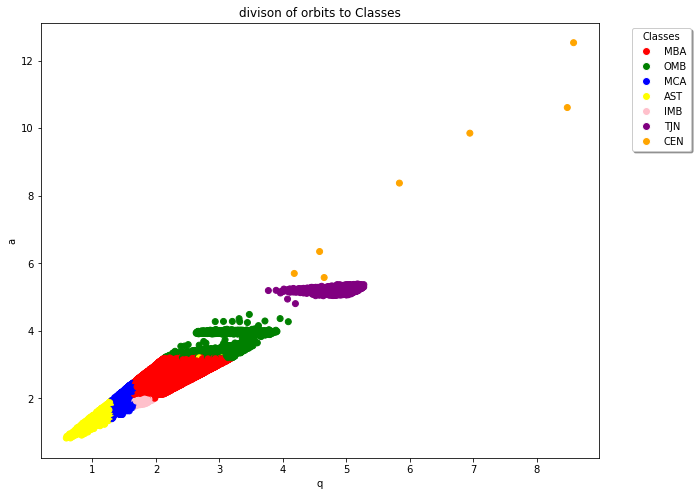

In [281]:
colors = {'MBA':'red', 'OMB':'green', 'MCA':'blue', 'AST':'yellow' , 'IMB':'pink' , 'TJN':'purple' , 'CEN' :'orange'}

fig , ax = plt.subplots(1,1,figsize=(10,8))

ax.scatter(x=df_JPL[(df_JPL['q']<10) & (df_JPL['a']<25)]['q'], y=df_JPL[(df_JPL['q']<10) & (df_JPL['a']<25)]['a'] ,c=df_JPL[(df_JPL['q']<10) & (df_JPL['a']<25)]['Category'].map(colors))

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Classes', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left',shadow=True)

ax.set_xlabel("q")
ax.set_ylabel("a")
ax.set_title("divison of orbits to Classes")

we can really see the divison of our orbits to classes and the use of KNN here should be good

### KNN process

we cannot accept zeros , we should not get any but if we do we need to handle that data i guess that if i got zero in any paramater of **a** , **q** , **Q** ,**e**,**i**,**node** ,**peri**,**period** i will delete this row cause i dont want to manipulte with mean value it will be data that is not true

lets first check for zeros

In [282]:
print("a zeros :" ,len(df_JPL[df_JPL['a'] == 0]))
print("q zeros :" ,len(df_JPL[df_JPL['q'] == 0]))
print("Q zeros :" ,len(df_JPL[df_JPL['Q'] == 0]))
print("e zeros :" ,len(df_JPL[df_JPL['e'] == 0]))
print("i zeros :" ,len(df_JPL[df_JPL['i'] == 0]))
print("node zeros :" ,len(df_JPL[df_JPL['node'] == 0]))
print("peri zeros :" ,len(df_JPL[df_JPL['peri'] == 0]))
print("period zeros :" ,len(df_JPL[df_JPL['period'] == 0]))



e_ = df_JPL[df_JPL['e']==0].index
node_ =df_JPL[df_JPL['node']==0].index
peri_ = df_JPL[df_JPL['peri']==0].index

df_JPL.drop(e_,axis=0,inplace=True)
df_JPL.drop(node_,axis=0,inplace=True)
df_JPL.drop(peri_,axis=0,inplace=True)

a zeros : 0
q zeros : 0
Q zeros : 0
e zeros : 1
i zeros : 0
node zeros : 6
peri zeros : 3
period zeros : 0


let's split now the data to split and train

In [283]:
XTrain, XTest, yTrain, yTest = train_test_split(df_JPL[['a','e','i','node','peri','q','Q','period']], df_JPL['Category'], test_size=0.3)

##becuase we use an algorithm that calc distance between points we need to normailze our data

scaler = StandardScaler()
XTrain = scaler.fit_transform(XTrain)
XTest = scaler.transform(XTest)

now lets choose K we want to reach K as we definded when we explained about the classes ,but first lets start with a minmal value of K lets say 5 classes

In [284]:
k = 4
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)

KNeighborsClassifier(n_neighbors=4)

let's check the result

In [285]:
y_pred=clf.predict(XTest)

print(metrics.confusion_matrix(y_true = yTest, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

[[    91      0      1     76      3     10      0]
 [     0      6      0      0      0      0      2]
 [     0      0   1576      7      3      0      0]
 [     5      0     18 117114     19    119      0]
 [     8      0     61    175    456      0      0]
 [     7      0      0   1254      0   2065      0]
 [     0      0      0      0      0      0   1128]]
Accuracy =  0.9857653537728254


we got a good accuracy but lets try a diffrent number of k's 


In [286]:
f1_list=[]
acc_score=[]
k_list=[]
for k in range(5,11):
    clf=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(XTrain,yTrain)
    pred=clf.predict(XTest)
    f=f1_score(yTest,pred,average='macro')
    acc_score.append(metrics.accuracy_score(yTest,pred))
    f1_list.append(f)
    k_list.append(k)
    
df=pd.DataFrame({"k":k_list,"F1 scores":f1_list,"Accuary score":acc_score})
df

,k,F1 scores,Accuary score
0,5,0.853587,0.987472
1,6,0.844454,0.985991
2,7,0.836347,0.986691
3,8,0.827317,0.985476
4,9,0.834461,0.986474
5,10,0.827790,0.985403


we can see that when k=7 we get our best f score ...and for k=5 we get our best accuary score we wanted to get something about k=7 like in the above graph and we did get it we can see that the result for k=5 to k=10 are pretty much the same 

here we can input vals of our paramters and predict to which class the asteroid will be assiganed to and we plot the orbit

In [289]:
k = 7
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)

e = float(input("Please enter Orbital eccentricity value(vals between [0-1]): "))
i = float(input("Please enter inclination value(degree): "))
q = float(input("Please enter perihelion distance(AU): "))
Q = float(input("Please enter aphelion distance (AU): "))
a = (q+Q)/2
node = float(input("Please enter longitude of the ascending node (degree): "))
period = float(input("Please enter sidereal orbital period:(years) "))
peri = float(input("Please enter argument of perihelion (degree): "))
M= float(input("Please enter mean anomaly (degree): "))

orb = Orbit.from_classical(Sun, a*u.AU, e*u.one, i*u.deg, node*u.deg, peri*u.deg, M*u.deg)

print('The prediction of the class is :' ,clf.predict([[a,e,i,node,peri,q,Q,period]])[0])

print('The orbit should look like:')

orb.plot(interactive = True,use_3d=True)

Please enter Orbital eccentricity value(vals between [0-1]): 0.001
Please enter inclination value(degree): 150
Please enter perihelion distance(AU): 5000
Please enter aphelion distance (AU): 2000
Please enter longitude of the ascending node (degree): 350
Please enter sidereal orbital period:(years) 19999
Please enter argument of perihelion (degree): 320
Please enter mean anomaly (degree): 32
The prediction of the class is : CEN
The orbit should look like:
